In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L1VzZXJzL2FwdXJ2YW5ha2FkZS9HaXRodWIvTW9udGUtQ2FybG8tTWV0aG9kcy9jaGFwdGVycy9lc3RpbWF0aW9u'
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
globals()["__spec__"] = None

/var/folders/2y/zsgtjj415jdb0d4y2b_wx7th0000gn/T/ipykernel_21319/2528839951.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap.py": 1708117302.8894389, "/Users/apurvanakade/miniconda3/lib/python3.12/importlib/_bootstrap_external.py": 1708117302.895673, "/Users/apurvanakade/miniconda3/lib/python3.12/zipimport.py": 1708117300.842618, "/Users/apurvanakade/miniconda3/lib/python3.12/codecs.py": 1708117300.2231953, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/aliases.py": 1708117301.4904184, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/__init__.py": 1708117301.4862745, "/Users/apurvanakade/miniconda3/lib/python3.12/encodings/utf_8.py": 1708117302.0979323, "/Users/apurvanakade/miniconda3/lib/python3.12/abc.py": 1708117300.1248448, "/Users/apurvanakade/miniconda3/lib/python3.12/io.py": 1708117300.4300423, "/Users/apurvanakade/miniconda3/lib/python3.12/stat.py": 1708117300.6806324, "/Users/apurvanakade/miniconda3/lib/python3.12/_collections_abc.py": 1708117300.0486746, "/Users/apurvanakade/miniconda3/lib/python3.12/genericpath.

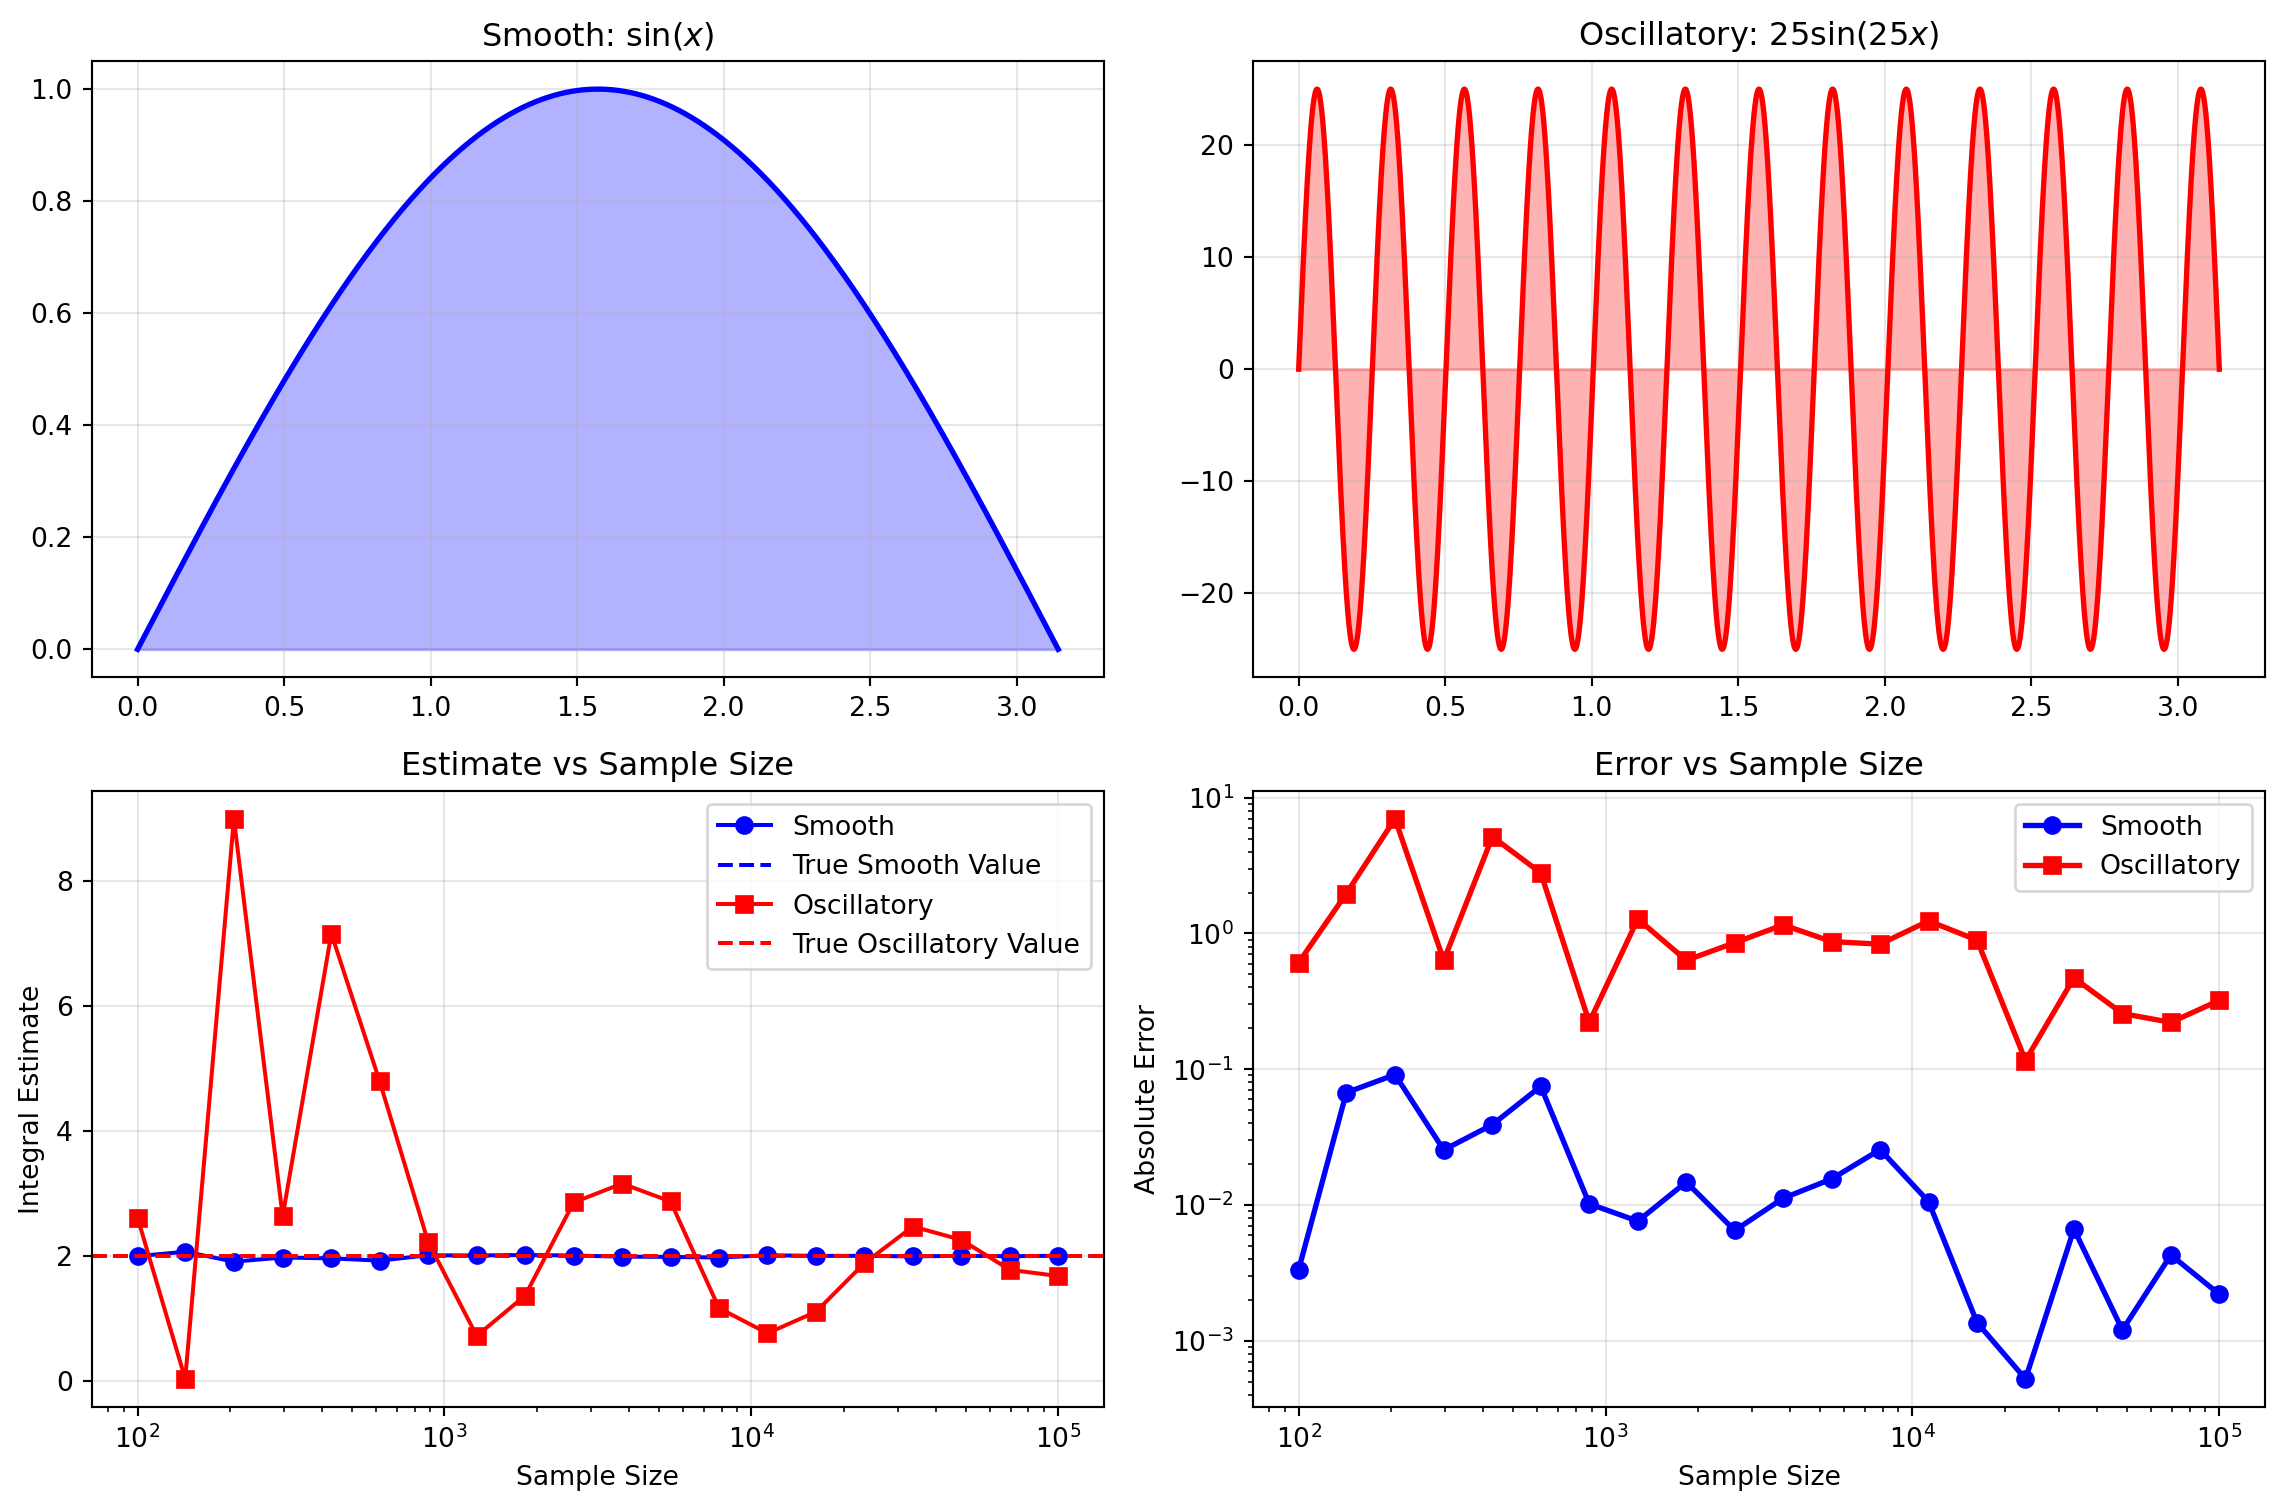

      Function  True Value  Mean Est   Error  Std Dev  Std Ratio
0       Smooth         2.0    2.0008  0.0008   0.0086          -
1  Oscillatory         2.0    1.9919  0.0081   0.6073  71.006457


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

np.random.seed(0)

def monte_carlo_integrate(func, a, b, n_samples):
    x_samples = np.random.uniform(a, b, n_samples)
    return (b - a) * np.mean(func(x_samples))

# Function definitions and configuration
FUNCTIONS = {
    'smooth': {
        'func': lambda x: np.sin(x),
        'label': r'Smooth: $\sin(x)$',
        'color': 'blue',
        'marker': 'o',
        'true_value': 2.0
    },
    'oscillatory': {
        'func': lambda x: 25 * np.sin(25 * x),
        'label': r'Oscillatory: $25\sin(25x)$',
        'color': 'red', 
        'marker': 's',
        'true_value': 2.0
    }
}

# Integration bounds
a, b = 0, np.pi
x = np.linspace(a, b, 10000)
sample_sizes = np.logspace(2, 5, 20).astype(int)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
ax1, ax2, ax3, ax4 = axes.flatten()

# Plot functions and calculate estimates/errors
estimates = {}
errors = {}

for i, (name, config) in enumerate(FUNCTIONS.items()):
    func = config['func']
    color = config['color']
    
    # Plot function (top row)
    ax = ax1 if i == 0 else ax2
    y_vals = func(x)
    sns.lineplot(x=x, y=y_vals, ax=ax, color=color, linewidth=2)
    ax.fill_between(x, 0, y_vals, alpha=0.3, color=color)
    ax.set_title(config['label'])
    ax.grid(True, alpha=0.3)
    
    # Calculate estimates and errors for all sample sizes
    estimates[name] = [monte_carlo_integrate(func, a, b, n) for n in sample_sizes]
    errors[name] = [abs(est - config['true_value']) for est in estimates[name]]

# Plot estimates vs sample size
ax3.set_title('Estimate vs Sample Size')
for name, config in FUNCTIONS.items():
    ax3.plot(sample_sizes, estimates[name], 
             color=config['color'], marker=config['marker'], 
             label=name.capitalize(), linestyle='-')
    ax3.axhline(config['true_value'], color=config['color'], 
                linestyle='--', label=f'True {name.capitalize()} Value')

ax3.set_xscale('log')
ax3.set_xlabel('Sample Size')
ax3.set_ylabel('Integral Estimate')
ax3.legend()
ax3.grid(True, alpha=0.3)

# Plot convergence errors
ax4.set_title('Error vs Sample Size')
for name, config in FUNCTIONS.items():
    ax4.loglog(sample_sizes, errors[name], 
               color=config['color'], marker=config['marker'],
               label=name.capitalize(), linewidth=2)

ax4.set_xlabel('Sample Size')
ax4.set_ylabel('Absolute Error')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Multiple estimates at fixed sample size for statistical analysis
n_test = 10000
n_runs = 25

multiple_estimates = {}
for name, config in FUNCTIONS.items():
    multiple_estimates[name] = [
        monte_carlo_integrate(config['func'], a, b, n_test) 
        for _ in range(n_runs)
    ]

# Create comparison DataFrame
comparison_data = []
std_devs = {}

for name, config in FUNCTIONS.items():
    estimates_list = multiple_estimates[name]
    mean_est = np.mean(estimates_list)
    std_dev = np.std(estimates_list)
    std_devs[name] = std_dev
    
    comparison_data.append({
        "Function": name.capitalize(),
        "True Value": config['true_value'],
        "Mean Est": mean_est,
        "Error": abs(mean_est - config['true_value']),
        "Std Dev": std_dev
    })

df_compare = pd.DataFrame(comparison_data)

# Add std ratio (avoiding division by zero)
smooth_std = std_devs['smooth']
osc_std = std_devs['oscillatory']
df_compare['Std Ratio'] = ['-', osc_std / smooth_std if smooth_std > 0 else np.nan]

# Display formatted results
print(df_compare.round(4))

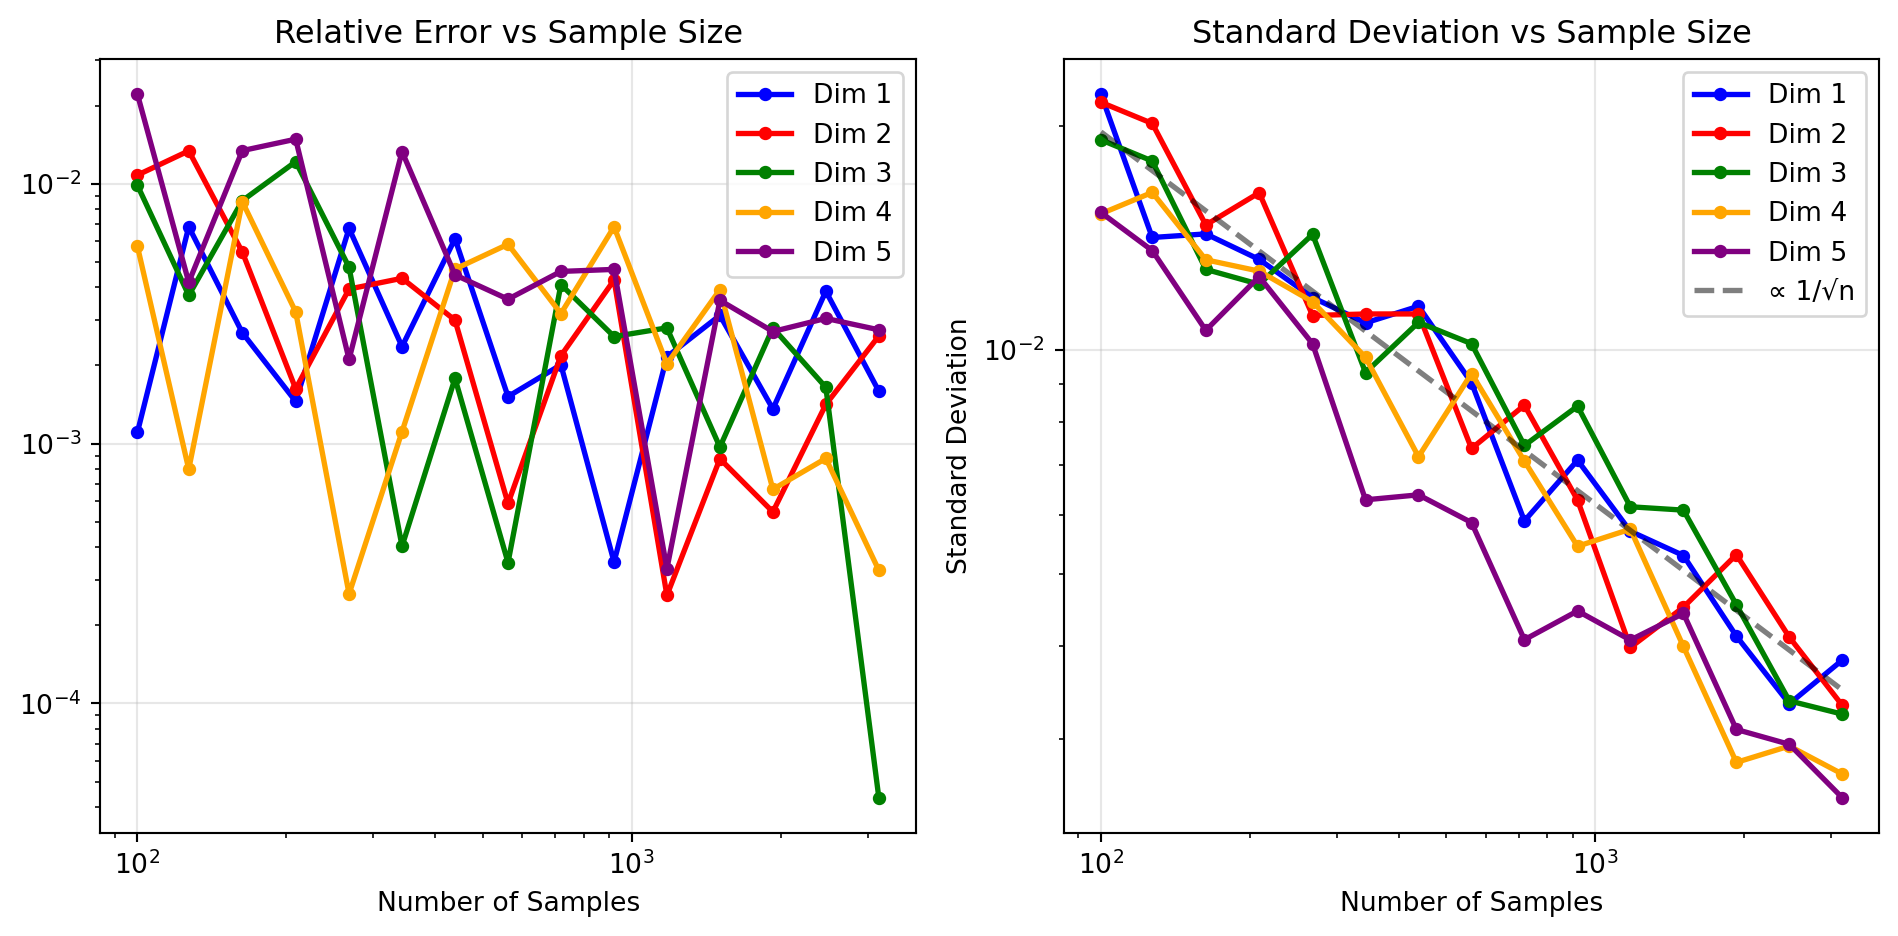

In [3]:
#| label: fig-multidimensional
#| fig-cap: Monte Carlo advantage in higher dimensions

def multidimensional_example():
    """Demonstrate MC integration in higher dimensions"""
    
    # Function: exp(-||x||²) over unit hypercube
    def f_nd(points):
        # Ensure points is always 2D: (n_samples, n_dimensions)
        if points.ndim == 1:
            points = points.reshape(-1, 1)
        return np.exp(-np.sum(points**2, axis=1))
    
    dimensions = [1, 2, 3, 4, 5]
    sample_sizes = np.logspace(2, 3.5, 15).astype(int)  # From 100 to ~3000 samples
    n_runs = 30  # Number of runs for each sample size
    
    colors = ['blue', 'red', 'green', 'orange', 'purple']
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    
    for dim_idx, dim in enumerate(dimensions):
        estimates_std = []
        rel_errors = []
              
        # Get a reference value using the largest sample size
        ref_estimates = []
        ref_n_samples = sample_sizes[-1] * 2  # Use even larger sample for reference
        for _ in range(10):
            if dim == 1:
                points = np.random.uniform(0, 1, (ref_n_samples, 1))
            else:
                points = np.random.uniform(0, 1, (ref_n_samples, dim))
            f_values = f_nd(points)
            ref_estimates.append(np.mean(f_values))
        reference_value = np.mean(ref_estimates)
        
        for n_samples in sample_sizes:
            estimates = []
            for run in range(n_runs):
                # Ensure consistent sampling for all dimensions
                if dim == 1:
                    points = np.random.uniform(0, 1, (n_samples, 1))
                else:
                    points = np.random.uniform(0, 1, (n_samples, dim))
                
                f_values = f_nd(points)
                estimate = np.mean(f_values)
                estimates.append(estimate)
            
            mean_est = np.mean(estimates)
            std_est = np.std(estimates)
            rel_error = abs(mean_est - reference_value) / abs(reference_value)
            
            estimates_std.append(std_est)
            rel_errors.append(rel_error)
        
        # Plot 1: Relative error vs sample size
        ax1.loglog(sample_sizes, rel_errors, 'o-', 
                  color=colors[dim_idx], label=f'Dim {dim}', 
                  linewidth=2, markersize=4)
        
        # Plot 2: Standard deviation vs sample size
        ax2.loglog(sample_sizes, estimates_std, 'o-', 
                  color=colors[dim_idx], label=f'Dim {dim}', 
                  linewidth=2, markersize=4)
    
    # Formatting
    ax1.set_xlabel('Number of Samples')
    ax1.set_ylabel('')
    ax1.set_title('Relative Error vs Sample Size')
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    
    ax2.set_xlabel('Number of Samples')
    ax2.set_ylabel('Standard Deviation')
    ax2.set_title('Standard Deviation vs Sample Size')
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    
    # Add theoretical 1/sqrt(n) reference line to std plot
    # Use average std from first point to scale the reference line
    first_stds = []
    for dim_idx, dim in enumerate(dimensions):
        estimates = []
        for run in range(n_runs):
            if dim == 1:
                points = np.random.uniform(0, 1, (sample_sizes[0], 1))
            else:
                points = np.random.uniform(0, 1, (sample_sizes[0], dim))
            f_values = f_nd(points)
            estimate = np.mean(f_values)
            estimates.append(estimate)
        first_stds.append(np.std(estimates))
    
    avg_first_std = np.mean(first_stds)
    scaling_factor = avg_first_std * np.sqrt(sample_sizes[0])
    theoretical_std = scaling_factor / np.sqrt(sample_sizes)
    ax2.loglog(sample_sizes, theoretical_std, 'k--', alpha=0.5, 
              linewidth=2, label='∝ 1/√n')
    ax2.legend()
    
    plt.tight_layout()
    plt.show()

multidimensional_example()